In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time

from sklearn.manifold import TSNE
from PIL import Image
import cv2

In [18]:
np.random.seed(50)

# load data images
PATH_TO_DATASET = 'C:\\Users\\Filip\\Documents\\Master_rad\\product_Dataset'
styles_csv = pd.read_csv(PATH_TO_DATASET + "\\styles.csv", error_bad_lines=False)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [19]:
styles_csv.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [20]:
len(styles_csv.articleType.unique())

143

In [21]:
styles_csv.articleType.value_counts()[styles_csv.articleType.value_counts() > 1]

Tshirts                      7067
Shirts                       3217
Casual Shoes                 2845
Watches                      2542
Sports Shoes                 2036
Kurtas                       1844
Tops                         1762
Handbags                     1759
Heels                        1323
Sunglasses                   1073
Wallets                       936
Flip Flops                    914
Sandals                       897
Briefs                        849
Belts                         813
Backpacks                     724
Socks                         686
Formal Shoes                  637
Perfume and Body Mist         613
Jeans                         609
Shorts                        547
Trousers                      530
Flats                         500
Bra                           477
Dresses                       464
Sarees                        427
Earrings                      416
Deodorant                     347
Nail Polish                   329
Lipstick      

In [22]:
reduced_articleType_list = styles_csv.articleType.value_counts()[styles_csv.articleType.value_counts() > 1000].index

In [23]:
reduced_articleType_list

Index(['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Sports Shoes',
       'Kurtas', 'Tops', 'Handbags', 'Heels', 'Sunglasses'],
      dtype='object')

Take random sample of 1000 images where articleType counts > 1000

In [31]:
PATH_TO_DATASET_IMAGES = PATH_TO_DATASET + "\\images\\"

In [39]:
reduced_articleType_list

Index(['Tshirts', 'Shirts', 'Casual Shoes', 'Watches', 'Sports Shoes',
       'Kurtas', 'Tops', 'Handbags', 'Heels', 'Sunglasses'],
      dtype='object')

(1000, 3)


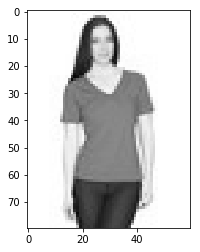

Tshirts
(1000, 3)


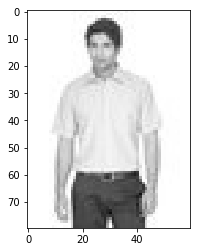

Shirts
(1000, 3)


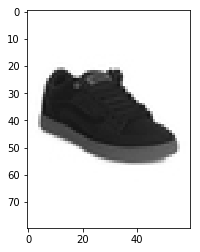

Casual Shoes
(1000, 3)


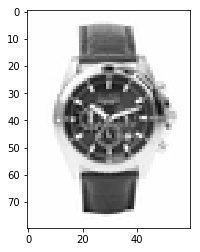

Watches
(1000, 3)


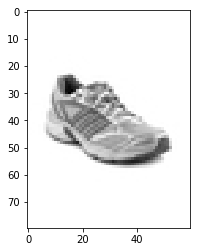

Sports Shoes
(1000, 3)


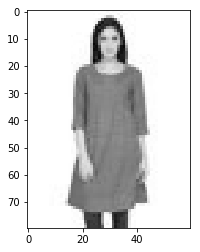

Kurtas
(1000, 3)


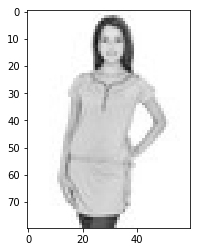

Tops
(1000, 3)


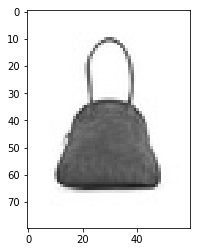

Handbags
(1000, 3)


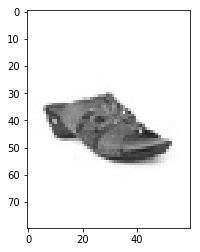

Heels
(1000, 3)


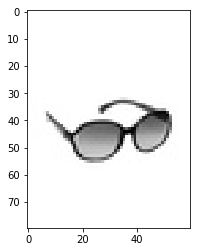

Sunglasses


In [85]:
list_of_images = []
list_of_ids = []
list_of_types = []
list_of_genders = []
n_images = 1000
random_state = 10


for articleType in reduced_articleType_list:
    #take random sample of n_images
    images_random_sample = styles_csv.loc[styles_csv.articleType == articleType, ['id','gender','articleType']].sample(n = n_images, random_state= random_state)
    list_of_ids = list_of_ids + list(images_random_sample['id'])
    list_of_types = list_of_types + list(images_random_sample['articleType'])
    list_of_genders = list_of_genders + list(images_random_sample['gender'])
    # load images by ids and show 1 representative pic
    first_pic = True
    for index in images_random_sample['id']:
        image = np.array(cv2.imread(PATH_TO_DATASET_IMAGES + str(index) + ".jpg"))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        if first_pic:
            plt.imshow(image, cmap='gray', vmin=0, vmax=255)
            plt.show()
            first_pic = False
            print(articleType)
        list_of_images.append(image)
    
    
    

In [59]:
X = np.zeros((len(list_of_images), list_of_images[0].shape[0] *list_of_images[0].shape[1]))
height = 80
width = 60
for i, image in enumerate(list_of_images):
    if (list_of_images[i].shape[0] != height) or (list_of_images[i].shape[1] != width):
        list_of_images[i] = cv2.resize(image1,(width, height))
    X[i,:] = list_of_images[i].ravel()

PCA to reduce dimensity

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30, random_state = random_state)
X_pca = pca.fit_transform(X)


Fit t-SNE

In [70]:
t_SNE = TSNE(n_components = 2, verbose = 1, random_state = random_state)

In [71]:
X_trans = t_SNE.fit_transform(X_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.073s...
[t-SNE] Computed neighbors for 10000 samples in 1.986s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 342.584285
compute_pairwise_joint_probabilities_nn 1.0312376022338867
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.374840
[t-SNE] KL diverge

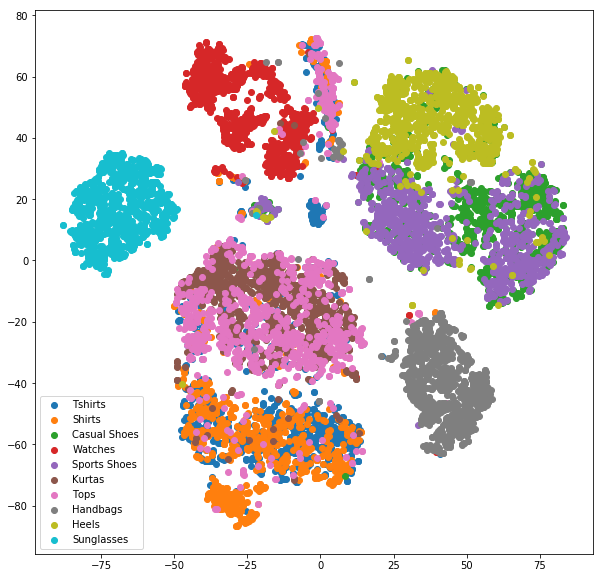

In [84]:
plt.figure(figsize = (8,8))
for articleType in reduced_articleType_list:
    plt.scatter(X_trans[reduces_styles.articleType == articleType,0], X_trans[reduces_styles.articleType == articleType,1])
plt.legend(reduced_articleType_list)
plt.show()

In [79]:
reduces_styles = pd.DataFrame(data = list(zip(list_of_ids,list_of_types,list_of_genders)), columns= ['id','articleType','gender'])

In [80]:
reduces_styles

,id,articleType,gender
0,2586,Tshirts,Women
1,18636,Tshirts,Men
2,28621,Tshirts,Men
3,6024,Tshirts,Women
4,15045,Tshirts,Boys
5,11750,Tshirts,Women
6,32425,Tshirts,Men
7,12907,Tshirts,Men
8,2142,Tshirts,Men
9,44226,Tshirts,Men
